# **Statistical Methods in Finance**
## *Image Compression*
---

- Copyright (c) Antoine Jacquier (QuantLearn Ltd), 2022. All rights reserved

- Author: Antoine Jacquier <Jack.QuantLearn@gmail.com>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image

We show in this notebook how to use the Singular value Decomposition for image compression.

## Original image

For details about the PIL Image package, see https://pillow.readthedocs.io/en/3.1.x/reference/Image.html

You should change the file name:

In [2]:
file = "IMG54271.JPG"

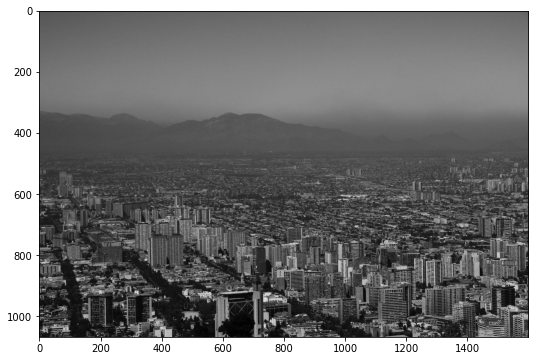

In [3]:
img = Image.open(file)
imgBW = img.convert('RGB')
plt.figure(figsize=(10, 6))
plt.imshow(imgBW);

### Converting the image into a matrix

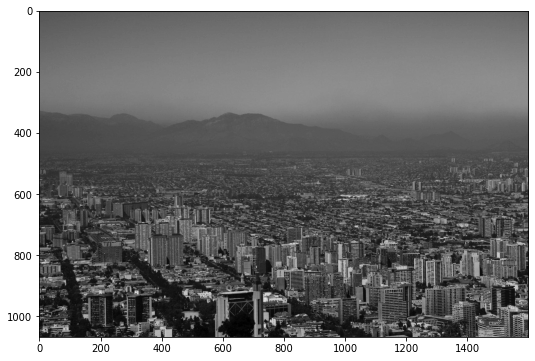

In [4]:
imgmat = np.array(list(imgBW.getdata(band=0)), float)
imgmat.shape = (imgBW.size[1], imgBW.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

## Singular value decomposition

In [5]:
U, sigma, V = np.linalg.svd(imgmat)

### Reconstructing the image from the SVD

#### Using only the first singular vector

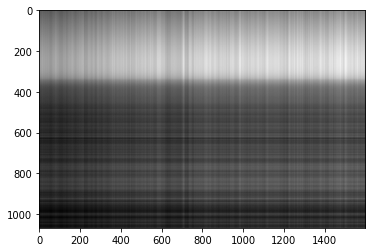

In [6]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
plt.imshow(reconstimg, cmap='gray');

#### Using the first k singular vectors

In [10]:
def compressReconstruct(myImag, k):
    U, sigma, V = np.linalg.svd(myImag)
    varExplained = np.sum(sigma[:k]) / np.sum(sigma)
    reconstimg = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    return reconstimg, varExplained

We now vary the number of eigenvectors considered (remember that they are ordered in decreasing order),
and plot the reconstructed matrix.
We also indicate:
\begin{align}
\text{Compression ratio: } & \qquad \frac{k}{p},\\
\text{Variance explained: } & \qquad \frac{\sum_{i=1}^{k}\lambda_i}{\sum_{i=1}^{n}\lambda_i},
\end{align}
where $\lambda_1>\lambda_2>\ldots>\lambda_n$ denote the $n$ eigenvalues of the initial covariance matrix, and $p$ is the total number of variables (here $p=1067$ is the shape of the image).

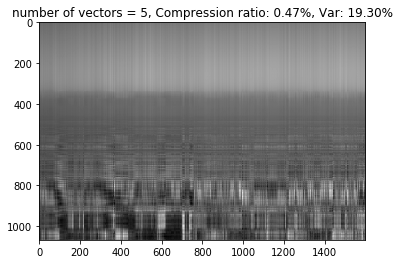

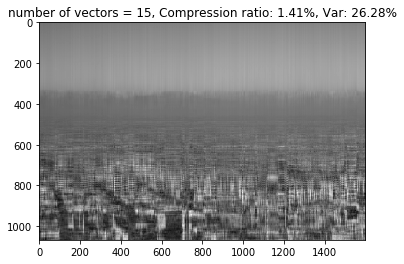

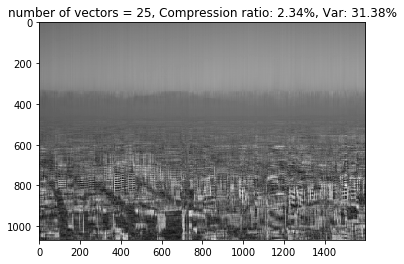

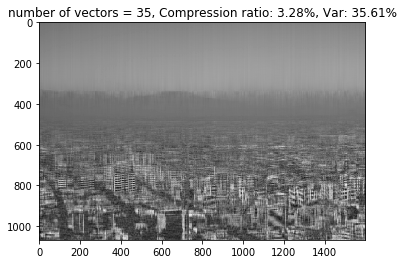

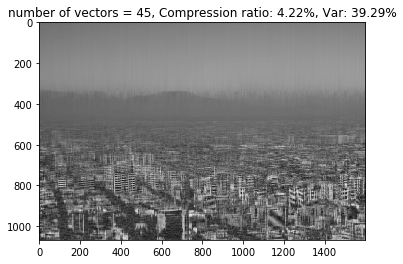

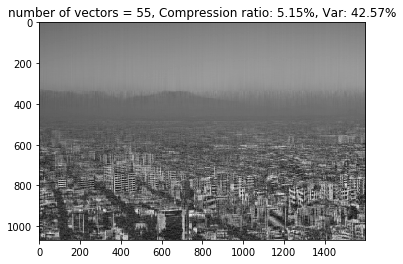

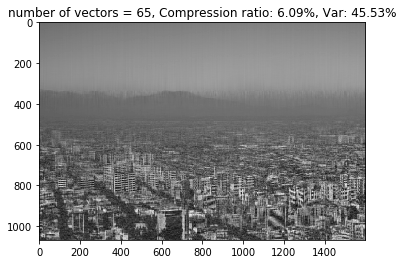

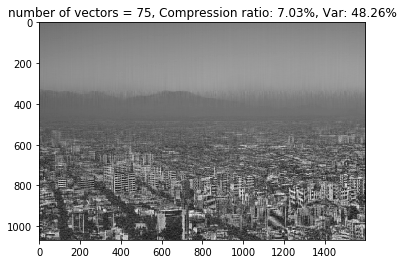

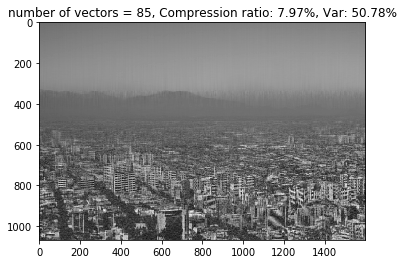

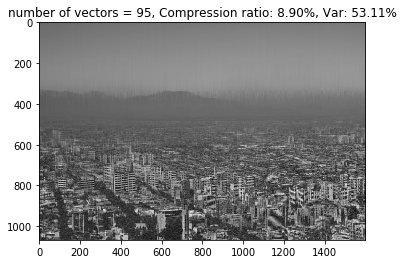

In [13]:
for k in np.arange(5, 101, 10):
    myImag, varExplained = compressReconstruct(imgmat, k)
    varExplained = 100.*varExplained
    cr = 100.*k/myImag.shape[0]
    plt.imshow(myImag, cmap='gray')
    plt.title("number of vectors = %s" % k + ", Compression ratio: %.2f" % cr + "%" + ", Var: %.2f" % varExplained + "%")
    plt.show()